# Brazilian E-commerce Data Exploration and Preprocessing

## 1. Initial Data Loading and Overview

We're working with the Olist Brazilian E-commerce dataset, which contains real commercial data in both Portuguese and English. The dataset consists of several CSV files:

- Products dataset (32,951 rows)
- Orders dataset (99,441 rows)
- Order items dataset (112,650 rows)
- Customers dataset (99,441 rows)
- Category translations (71 rows)

### Key Dataset Relationships
- Products are linked to Order Items through product_id
- Orders are linked to Order Items through order_id
- Customers are linked to Orders through customer_id

### Data Quality Findings
1. Missing Orders: We found 775 orders (99,441 - 98,666) that exist in the orders table but have no items associated with them
2. Category Translations: Initially found untranslated categories including:
   - 'pc_gamer'
   - 'portateis_cozinha_e_preparadores_de_alimentos'
3. Data Consistency: Perfect match between products referenced in orders (32,951) and total products in catalog (32,951)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Construct the path explicitly
PROJECT_ROOT = Path(r"c:\Users\User\Desktop\vectorshop") 

# Set up data paths
DATA_DIR = PROJECT_ROOT / 'data'
RAW_DIR = DATA_DIR / 'raw'

print(f"Looking for data in: {RAW_DIR}")

# Verify the data directory exists and contains our files
print("\nChecking data directory contents:")
for file in RAW_DIR.glob('*.csv'):
    print(f"Found file: {file.name}")

def explore_dataset(file_name: str) -> pd.DataFrame:
    """
    Load and provide basic analysis of a dataset.
    
    Parameters:
    file_name: Name of the CSV file
    
    Returns:
    pd.DataFrame: The loaded dataset
    """
    file_path = RAW_DIR / file_name
    
    if not file_path.exists():
        print(f"Error: File not found: {file_path}")
        return None
        
    print(f"\n{'='*50}")
    print(f"Analyzing {file_name}")
    print(f"{'='*50}")
    
    # Read the dataset
    df = pd.read_csv(file_path)
    
    print(f"\nShape: {df.shape}")
    print("\nFirst few rows:")
    display(df.head())
    
    print("\nData Info:")
    print(df.info())
    
    print("\nMissing Values:")
    missing = df.isnull().sum()
    print(missing[missing > 0])
    
    return df

# Load and explore each dataset
data_files = {
    'products': 'olist_products_dataset.csv',
    'orders': 'olist_orders_dataset.csv',
    'order_items': 'olist_order_items_dataset.csv',
    'customers': 'olist_customers_dataset.csv',
    'translations': 'product_category_name_translation.csv'
}

# Create a dictionary to store our dataframes
dfs = {}

# Load each dataset
for key, file in data_files.items():
    dfs[key] = explore_dataset(file)
    if dfs[key] is None:
        print(f"Warning: Could not load {file}")

Looking for data in: c:\Users\User\Desktop\vectorshop\data\raw

Checking data directory contents:
Found file: olist_customers_dataset.csv
Found file: olist_geolocation_dataset.csv
Found file: olist_orders_dataset.csv
Found file: olist_order_items_dataset.csv
Found file: olist_order_payments_dataset.csv
Found file: olist_order_reviews_dataset.csv
Found file: olist_products_dataset.csv
Found file: olist_sellers_dataset.csv
Found file: product_category_name_translation.csv

Analyzing olist_products_dataset.csv

Shape: (32951, 9)

First few rows:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None

Missing Values:
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_l

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None

Missing Values:
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
dtype: int64

Analyzing olist_order_items_dataset.csv

Shape: (112650, 7)

First few rows:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None

Missing Values:
Series([], dtype: int64)

Analyzing olist_customers_dataset.csv

Shape: (99441, 5)

First few rows:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None

Missing Values:
Series([], dtype: int64)

Analyzing product_category_name_translation.csv

Shape: (71, 2)

First few rows:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None

Missing Values:
Series([], dtype: int64)


In [6]:
# Visualize the relationships between datasets
import matplotlib.pyplot as plt
import numpy as np

def analyze_dataset_relationships(dfs):
    """
    Analyze and visualize relationships between datasets
    """
    print("Dataset Sizes:")
    for name, df in dfs.items():
        print(f"{name}: {len(df):,} rows")
    
    print("\nKey Relationships:")
    print("- Products → Order Items (product_id)")
    print("- Orders → Order Items (order_id)")
    print("- Customers → Orders (customer_id)")
    
    # Verify referential integrity
    print("\nChecking Data Consistency:")
    # Check if all order_items products exist in products dataset
    products_in_items = dfs['order_items']['product_id'].nunique()
    total_products = len(dfs['products'])
    print(f"Products referenced in orders: {products_in_items:,}")
    print(f"Total products in catalog: {total_products:,}")
    
    # Check orders consistency
    orders_in_items = dfs['order_items']['order_id'].nunique()
    total_orders = len(dfs['orders'])
    print(f"Orders in order_items: {orders_in_items:,}")
    print(f"Total orders: {total_orders:,}")

analyze_dataset_relationships(dfs)

Dataset Sizes:
products: 32,951 rows
orders: 99,441 rows
order_items: 112,650 rows
customers: 99,441 rows
translations: 71 rows

Key Relationships:
- Products → Order Items (product_id)
- Orders → Order Items (order_id)
- Customers → Orders (customer_id)

Checking Data Consistency:
Products referenced in orders: 32,951
Total products in catalog: 32,951
Orders in order_items: 98,666
Total orders: 99,441


Category Statistics:
Total categories: 71

Top 10 categories:
product_category_name_english
bed_bath_table           3029
sports_leisure           2867
furniture_decor          2657
health_beauty            2444
housewares               2335
auto                     1900
computers_accessories    1639
toys                     1411
watches_gifts            1329
telephony                1134
Name: count, dtype: int64

[nan 'pc_gamer' 'portateis_cozinha_e_preparadores_de_alimentos']


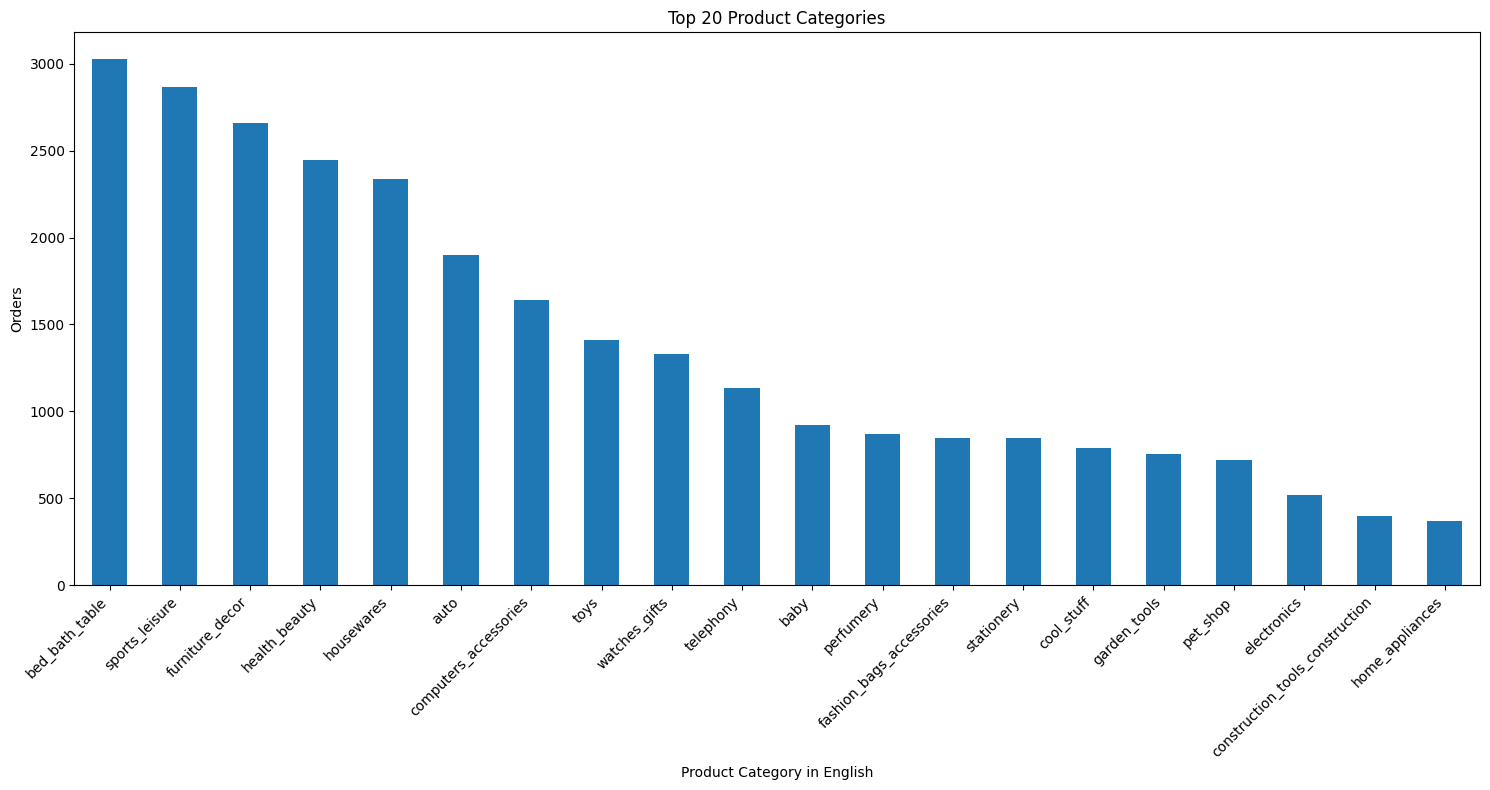

In [10]:
def analyze_product_categories(dfs):
    """
    Analyze product categories and their translations
    """
    # Merge products with translations
    products_df = dfs['products'].merge(
        dfs['translations'],
        on='product_category_name',
        how='left'
    )
    
    # Count categories
    category_counts = products_df['product_category_name_english'].value_counts()
    
    plt.figure(figsize=(15, 8))
    category_counts.head(20).plot(kind='bar')
    plt.title('Top 20 Product Categories')
    plt.xlabel("Product Category in English")
    plt.ylabel("Orders")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    print("Category Statistics:")
    print(f"Total categories: {len(category_counts)}")
    print("\nTop 10 categories:")
    print(category_counts.head(10))
    
    # Check for untranslated categories
    untranslated = products_df[products_df['product_category_name_english'].isnull()]
    if len(untranslated) > 0:
        print("\nWarning: Found untranslated categories:")
        print(untranslated['product_category_name'].unique())

analyze_product_categories(dfs)

In [11]:
def clean_categories(dfs):
    """
    Clean and standardize product categories
    """
    # Create a copy of the translations dictionary with manual additions
    translations_df = dfs['translations'].copy()
    
    # Add missing translations
    new_translations = {
        'pc_gamer': 'gaming_computers',
        'portateis_cozinha_e_preparadores_de_alimentos': 'portable_kitchen_appliances'
    }
    
    # Add new translations to the dataframe
    for pt, en in new_translations.items():
        translations_df.loc[len(translations_df)] = [pt, en]
    
    # Merge with products again
    products_df = dfs['products'].merge(
        translations_df,
        on='product_category_name',
        how='left'
    )
    
    # Check remaining untranslated categories
    still_untranslated = products_df[products_df['product_category_name_english'].isnull()]
    if len(still_untranslated) > 0:
        print("Categories still missing translations:")
        print(still_untranslated['product_category_name'].value_counts())
    
    return products_df

# Clean the categories
cleaned_products = clean_categories(dfs)

Categories still missing translations:
Series([], Name: count, dtype: int64)


## Display examples of raw vs preprocessed text from our product dataset

In [12]:
def show_text_preprocessing_examples(dfs):
    """
    Display examples of raw vs preprocessed text from our product dataset
    """
    # Get a few example products with descriptions
    products_df = dfs['products']
    
    print("Before we preprocess text, let's look at our current data:\n")
    
    # Display text length statistics
    print("Text Length Statistics:")
    print(f"Product names length: {products_df['product_name_lenght'].mean():.1f} characters (average)")
    print(f"Product descriptions length: {products_df['product_description_lenght'].mean():.1f} characters (average)")
    
    # Merge with translations for better understanding
    products_with_categories = products_df.merge(
        dfs['translations'],
        on='product_category_name',
        how='left'
    )
    
    # Show a few examples from different categories
    sample_categories = ['health_beauty', 'computers_accessories', 'furniture_decor']
    
    for category in sample_categories:
        products = products_with_categories[
            products_with_categories['product_category_name_english'] == category
        ].head(2)
        
        print(f"\n{'='*50}")
        print(f"Category: {category}")
        print(f"{'='*50}")
        for _, product in products.iterrows():
            print(f"Product ID: {product['product_id']}")
            print(f"Name Length: {product['product_name_lenght']}")
            print(f"Description Length: {product['product_description_lenght']}")
            print("---")

show_text_preprocessing_examples(dfs)

Before we preprocess text, let's look at our current data:

Text Length Statistics:
Product names length: 48.5 characters (average)
Product descriptions length: 771.5 characters (average)

Category: health_beauty
Product ID: e3e020af31d4d89d2602272b315c3f6e
Name Length: 58.0
Description Length: 1987.0
---
Product ID: c5d8079278e912d7e3b6beb48ecb56e8
Name Length: 60.0
Description Length: 330.0
---

Category: computers_accessories
Product ID: a1b71017a84f92fd8da4aeefba108a24
Name Length: 59.0
Description Length: 636.0
---
Product ID: c78b767da00efb70c1bcccab87c28cd5
Name Length: 35.0
Description Length: 1101.0
---

Category: furniture_decor
Product ID: 2548af3e6e77a690cf3eb6368e9ab61e
Name Length: 56.0
Description Length: 184.0
---
Product ID: 7bb6f29c2be57716194f96496660c7c2
Name Length: 51.0
Description Length: 2083.0
---


## Text preprocessing

### Standardization:
- Converting everything to lowercase
- Removing special characters
- Handling accents (important for Portuguese text)


### Normalization:
- Removing extra spaces
- Standardizing numbers and units
- Handling abbreviations

### Language-Specific Processing:
- Removing stopwords ("and", "the", "a" in English)
- Handling contractions
- Managing special characters in Portuguese

In [13]:
import re
from unicodedata import normalize

def preprocess_text_example(text: str, language: str = 'both') -> str:
    """
    Demonstrate text preprocessing steps
    """
    print("Original text:", text)
    
    # Step 1: Convert to lowercase
    text = text.lower()
    print("After lowercase:", text)
    
    # Step 2: Remove accents (important for Portuguese)
    text = normalize('NFKD', text).encode('ASCII', 'ignore').decode('ASCII')
    print("After accent removal:", text)
    
    # Step 3: Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    print("After special character removal:", text)
    
    # Step 4: Remove extra whitespace
    text = ' '.join(text.split())
    print("After whitespace cleanup:", text)
    
    return text

# Example texts (we'll get real examples from our dataset in the next step)
examples = [
    "Câmera Digital 16MP - Preto (BLACK)",
    "Desktop PC Gamer RGB/LED",
    "Mesa de Jantar 6 Cadeiras & Luxo"
]

print("Text Preprocessing Examples:\n")
for text in examples:
    print("\n" + "="*50)
    processed = preprocess_text_example(text)
    print("="*50)

Text Preprocessing Examples:


Original text: Câmera Digital 16MP - Preto (BLACK)
After lowercase: câmera digital 16mp - preto (black)
After accent removal: camera digital 16mp - preto (black)
After special character removal: camera digital 16mp   preto  black 
After whitespace cleanup: camera digital 16mp preto black

Original text: Desktop PC Gamer RGB/LED
After lowercase: desktop pc gamer rgb/led
After accent removal: desktop pc gamer rgb/led
After special character removal: desktop pc gamer rgb led
After whitespace cleanup: desktop pc gamer rgb led

Original text: Mesa de Jantar 6 Cadeiras & Luxo
After lowercase: mesa de jantar 6 cadeiras & luxo
After accent removal: mesa de jantar 6 cadeiras & luxo
After special character removal: mesa de jantar 6 cadeiras   luxo
After whitespace cleanup: mesa de jantar 6 cadeiras luxo


## Product Text Analysis
### This section analyzes the textual content of our product data to prepare for embedding model selection and text preprocessing.
## Purpose
### Understanding our text data is crucial for:

- Choosing the right embedding model that can handle our language mix
- Designing effective text preprocessing steps
- Planning tokenization strategies
- Identifying potential challenges in text processing